<h1 style="text-align: center; font-family: 'Arial', sans-serif; color: #2c3e50;">
  <strong>Graph Neural Networks - Hands-on session 2</strong>
</h1>

<hr style="border: 1px solid #2c3e50; width: 80%; margin: auto;">

<p style="text-align: center; font-family: 'Arial', sans-serif; color: #34495e; font-size: 18px;">
  This notebook introduces an introductory setup for running a GNN from GitHub on hyperbolic and elliptic problems.
</p>

**GitHub**: https://github.com/LucasUnizar/GNN-Workshop

<p style="text-align: center; font-family: 'Arial', sans-serif; color: #34495e; font-size: 18px;">
  <strong>Authors</strong><br>
  PhD student Lucas Tesan<br>
  PhD student Mikel Martinez
</p>

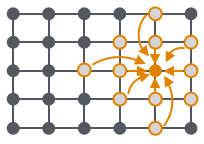


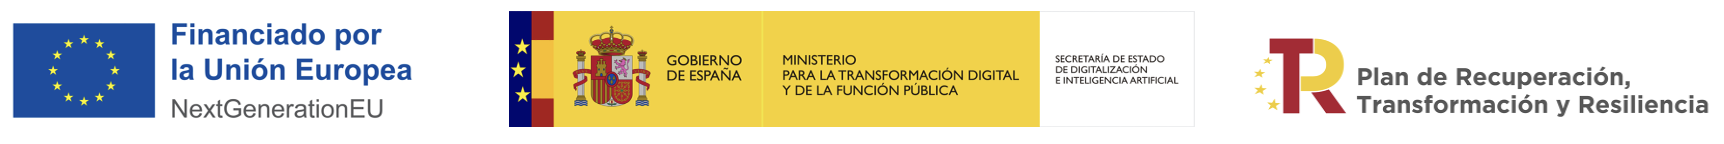

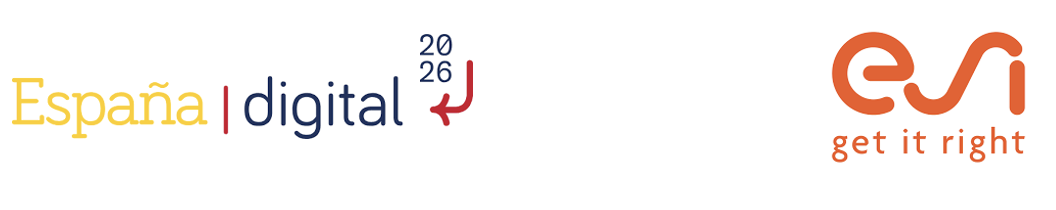

# 🌟 GNNs-Lightning Setup  
### 🛠️ *Environment Configuration & Repository Installation*  

**GitHub Repository:**
---

This section handles all the groundwork—cloning the GitHub repository, installing required libraries, and configuring the environment—so your notebook runs smoothly. Simply execute the cells below to get everything ready!



In [1]:
# Clone the repository
!git clone https://github.com/LucasUnizar/GNN-Workshop --quiet
%cd GNN-Workshop/
!pip install -r requirements.txt --quiet

/content/GNN-Workshop
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

# **3. Solving the Wave Equation with Graph Neural Networks**

In this section, we use **Graph Neural Networks (GNNs)** to solve the **wave equation**, a hyperbolic partial differential equation fundamental to modeling wave propagation in physics, engineering, and beyond. Instead of relying on traditional time-marching numerical methods (e.g., finite difference time domain), we adopt a **data-driven, single-step prediction** framework using GNNs.

## **Mathematical Formulation**

The wave equation is defined as:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u + f \quad \text{in} \ \Omega \times (0, T)
$$

with boundary and initial conditions:

$$
u = 0 \quad \text{on} \ \partial \Omega \times (0, T)
$$

$$
u(x, 0) = u_0(x), \quad \frac{\partial u}{\partial t}(x, 0) = v_0(x) \quad \text{for} \ x \in \Omega
$$

where:
- $u(x, t)$: Unknown solution (e.g., displacement field)  
- $f(x, t)$: Known source term (e.g., forcing)  
- $c$: Wave speed (can be constant or spatially varying)  
- $\nabla^2$: Laplacian operator  
- $\Omega$: Spatial domain  
- $\partial \Omega$: Domain boundary  
- $T$: Final time


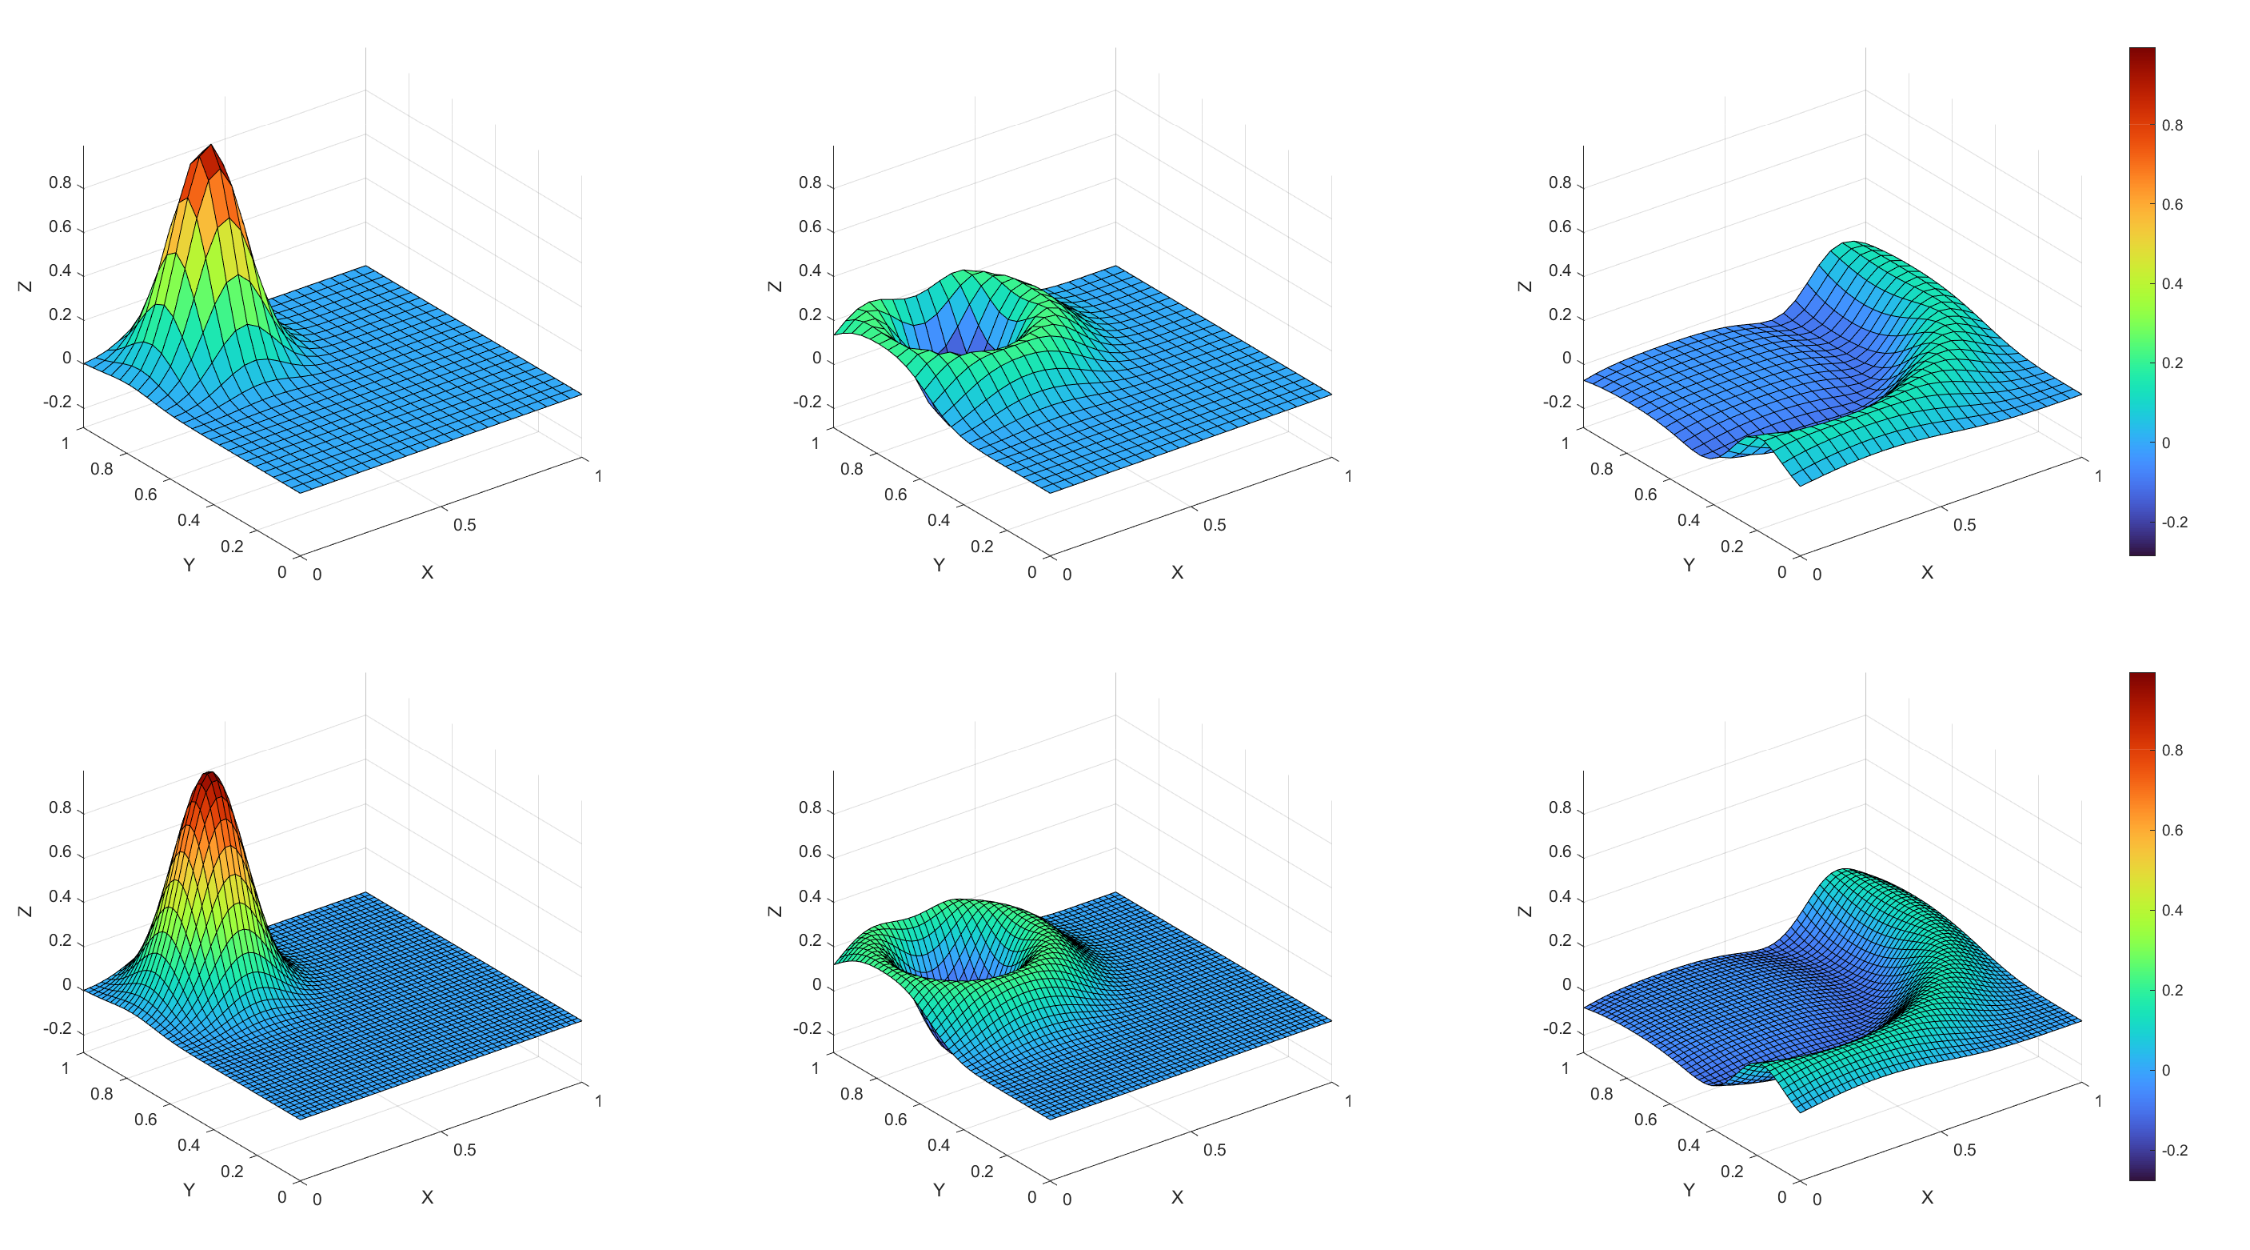

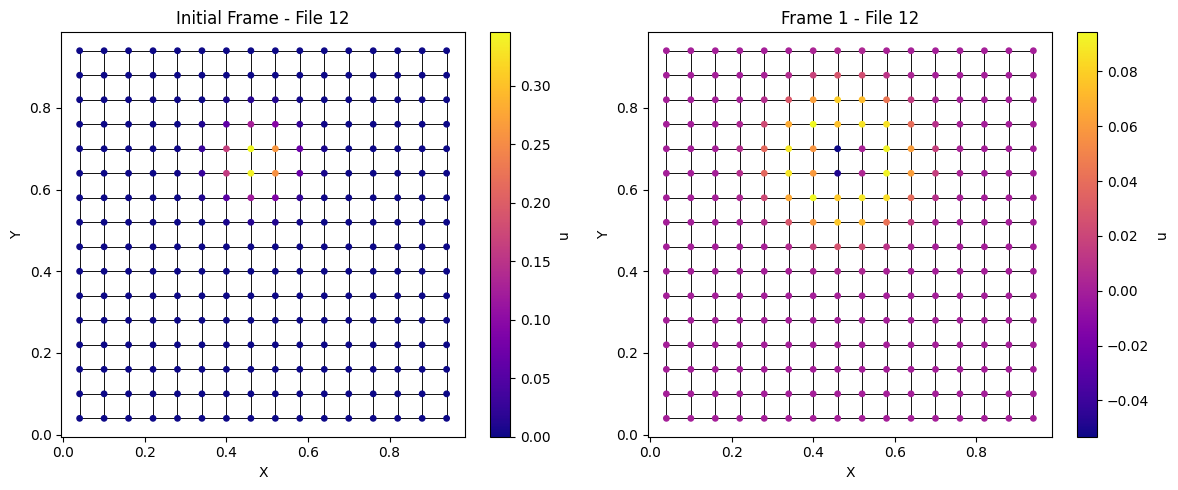

In [2]:
from src.dataloader.datamodule import GraphDataModule

# Data preparatio
data_module = GraphDataModule(dataset_dir='data/Jaca-SummerSchool25_waves/dataset', batch_size=1, ratio=1., dataset_type='gnn')
# Setup the data module (this loads the datasets)
data_module.setup(stage='fit')

# Visualize a single sample from the training set
data_module.plot_first_and_last_rollout(traj_index=12, frame=1)

In [3]:
!python train.py --dataset_dir data/Jaca-SummerSchool25_waves/dataset --model gnn --hidden 16 --layers 2 --mp_steps 6 --batch_size 64 --lr 1.e-3 --epochs 50 --eval_freq 10

Seed set to 1
Simulator model initialized
Using N-steps GNN model with 6 message-passing steps
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 3
wandb: You chose "Don't visualize my results"
wandb: WARNING `resume` will be ignored since W&B syncing is set to `offline`. Starting a new run with run id 91odwdes.
wandb: Tracking run with wandb version 0.20.1
wandb: W&B syncing is set to `offline` in this directory. Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type                    | Params | Mode 
-----------------------------------------------------------------------
0 | model              | EncoderProcessorDecoder | 5.6 K  | train
1 | _input_normalizer  | Normalizer              | 0      | train


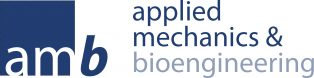

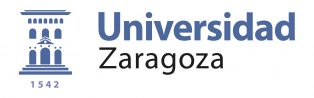